Librerias

In [91]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Visualizacion Mapa
import geocoder
import folium


Descargamos el dataset

In [92]:
file_id = '11Ju_njoylHatuDxD-isDh3Rw-FWq_kO6'

descarga = f'https://drive.google.com/uc?id={file_id}'

output = 'weatherAUS.csv'
gdown.download(descarga, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11Ju_njoylHatuDxD-isDh3Rw-FWq_kO6
To: c:\Users\aleja\Desktop\AA1 - TP2\AA1-TUIA-Prado-Peralta-Duclos\weatherAUS.csv
100%|██████████| 14.1M/14.1M [00:00<00:00, 15.2MB/s]


'weatherAUS.csv'

In [93]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('weatherAUS.csv')
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [95]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# EJERCICIO 1

## Regiones
En primera instancia crearemos clusters con las ciudades del Dataset para catalogarlas en otra categoría: regiones

In [96]:
#Verificamos las ubicaciones únicas
localidades = list(df['Location'].unique())
print(f"Cantidad de ubicaciones únicas: {len(localidades)}")
print(localidades)

Cantidad de ubicaciones únicas: 49
['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


Creamos un diccionario con las coordenadas de cada localidad.

In [97]:

def obtener_coordenadas(localidad):
    g = geocoder.arcgis(localidad + ", Australia")
    if g.ok:
        print(f"coordenadas de {localidad}: {g.latlng}")
        return g.latlng[0], g.latlng[1]
    else:
        print(f"No se encontraron coordenadas para {localidad}")
        return None, None

# Diccionario de localidades con sus coordenadas
dic_localidades = {}

# Iteramos sobre las localidades y obtenemos sus coordenadas
for localidad in localidades:
    latitud, longitud = obtener_coordenadas(localidad)
    dic_localidades[localidad] = (latitud, longitud)



coordenadas de Albury: [-36.05662430199993, 146.93533047100004]
coordenadas de BadgerysCreek: [-33.88202130999997, 150.74521554800003]
coordenadas de Cobar: [-31.495860105999952, 145.832820727]
coordenadas de CoffsHarbour: [-30.29956872599996, 153.1117219450001]
coordenadas de Moree: [-29.47154720499998, 149.83939643700012]
coordenadas de Newcastle: [-32.927488995999965, 151.778915696]
coordenadas de NorahHead: [-33.28433173899998, 151.56580326800008]
coordenadas de NorfolkIsland: [-29.033329999999978, 167.95000000000005]
coordenadas de Penrith: [-33.69895810699995, 150.73343820700006]
coordenadas de Richmond: [-20.729606200999967, 143.14032278700006]
coordenadas de Sydney: [-33.87056747899993, 151.20723505800004]
coordenadas de SydneyAirport: [-33.87056747899993, 151.20723505800004]
coordenadas de WaggaWagga: [-35.12576999999993, 147.3537500000001]
coordenadas de Williamtown: [-32.80863303799998, 151.84911938200003]
coordenadas de Wollongong: [-34.42387755899995, 150.89379758300004]
c

Vemos las localidades en el mapa.

In [98]:
# Mapa centrado en Australia
mapa = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

for localidad, (lat, lon) in dic_localidades.items():
    folium.CircleMarker(
        location=[lat, lon],
        radius=1,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        tooltip=localidad  
    ).add_to(mapa)
mapa


Utilizaremos un algoritmo de clustering para armar las regiones. Especificamente usaremos K-Means.

In [99]:
# Convertimos el diccionario en un DataFrame

df_location = pd.DataFrame(dic_localidades).T
df_location.columns = ['lat', 'lon']
df_location.index.names = ['Location']
df_location.reset_index(inplace=True)
df_location.head(5)


Location        lat         lon
0         Albury -36.056624  146.935330
1  BadgerysCreek -33.882021  150.745216
2          Cobar -31.495860  145.832821
3   CoffsHarbour -30.299569  153.111722
4          Moree -29.471547  149.839396

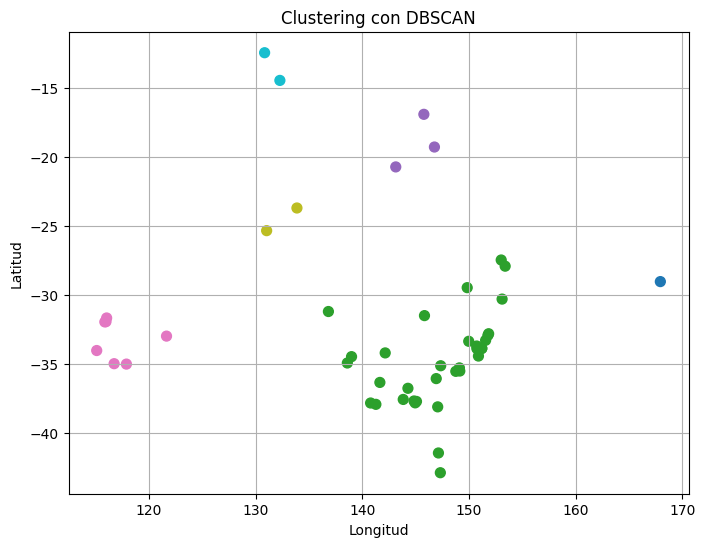

In [100]:

# Escalás las coordenadas
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df_location[['lat', 'lon']])

# Aplicás DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=2)  
df_location['cluster'] = dbscan.fit_predict(coords_scaled)

# Visualización simple
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_location['lon'], df_location['lat'], c=df_location['cluster'], cmap='tab10', s=50)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Clustering con DBSCAN")
plt.grid(True)
plt.show()


In [101]:
# Observamos la cantidad de de regiones por cluster
df_location.rename(columns={'cluster':'regiones'}, inplace=True)
df_location['regiones'] = df_location['regiones'].replace(-1, 5)
df_location = df_location[['Location','regiones']]
df_location

Location  regiones
0             Albury         0
1      BadgerysCreek         0
2              Cobar         0
3       CoffsHarbour         0
4              Moree         0
5          Newcastle         0
6          NorahHead         0
7      NorfolkIsland         5
8            Penrith         0
9           Richmond         1
10            Sydney         0
11     SydneyAirport         0
12        WaggaWagga         0
13       Williamtown         0
14        Wollongong         0
15          Canberra         0
16       Tuggeranong         0
17       MountGinini         0
18          Ballarat         0
19           Bendigo         0
20              Sale         0
21  MelbourneAirport         0
22         Melbourne         0
23           Mildura         0
24              Nhil         0
25          Portland         0
26          Watsonia         0
27          Dartmoor         0
28          Brisbane         0
29            Cairns         1
30         GoldCoast         0
31        Townsville         1
32          Adelaide         0
33      MountGambier         0
34         Nuriootpa         0
35           Woomera         0
36            Albany         2
37       Witchcliffe         2
38        PearceRAAF         2
39      PerthAirport         2
40             Perth         2
41        SalmonGums         2
42           Walpole         2
43            Hobart         0
44        Launceston         0
45      AliceSprings         3
46            Darwin         4
47         Katherine         4
48             Uluru         3

In [102]:
# Para Clasificar todo el data set, mapeamos usando Location
df = df.merge(df_location, on='Location')
df.head(5)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  regiones  
0       NaN     16.9     21.8        No           No         0  
1       NaN     17.2     24.3        No           No         0  
2       2.0     21.0     23.2        No           No         0  
3       NaN     18.1     26.5        No           No         0  
4       8.0     17.8     29.7        No           No         0

# Analisis de la variable target 'RainTomorrow'

In [103]:
# Cantidad de valores nulos en el target
print(df['RainTomorrow'].isna().sum())

# Porcentaje de valores nulos en el target respecto al total
print((df['RainTomorrow'].isna().sum())/len(df['RainTomorrow']))

3267
0.02245978275814657


Decidimos eliminar las filas que contienen valores nulos de mi variable target, ya que no representan un porcentaje significativo de nuestro dataset.

In [104]:
df = df.dropna(subset=['RainTomorrow'])
print(df['RainTomorrow'].isna().sum())

0


# EJERCICIO 2

## División de nuestro conjunto de datos

Separamos las variables predictoras de la objetivo

In [143]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

Dividimos el conjunto de datos en entrenamiento, validación y prueba.

- Entrenamiento: 60%
- Validación: 20%
- Prueba: 20%

In [144]:
# Train + Val vs test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train vs val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 0.25 * 0.8 = 0.2 → 60% train, 20% val, 20% test

In [145]:
# hacemos un reshape de los datos para que sean de 2 dimensiones
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)     
y_test = y_test.values.reshape(-1, 1)

In [146]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (85315, 23)
X_val shape: (28439, 23)
X_test shape: (28439, 23)
y_train shape: (85315, 1)
y_val shape: (28439, 1)
y_test shape: (28439, 1)


## EDA (Analisis Exploratorio de Datos)

### Descripcion de las variables en nuestro dataframe:


* **Date:** La fecha de la observación meteorológica.
* **Location:** La ubicación geográfica donde se realizó la observación.
* **MinTemp:** La temperatura mínima registrada en grados Celsius.
* **MaxTemp:** La temperatura máxima registrada en grados Celsius.
* **Rainfall:** La cantidad de lluvia registrada en milímetros (mm)
* **Evaporation:** La cantidad de evaporación en milímetros (mm) 
* **Sunshine:** El número de horas de sol durante el día.
* **WindGustDir:** La dirección del viento más fuerte durante el dia.
* **WindGustSpeed:** La velocidad del viento más fuerte en kilómetros por hora (km/h).
* **WindDir9am:** La dirección del viento a las 9 de la mañana. 
* **WindDir3pm:** La dirección del viento a las 3 de la tarde.
* **WindSpeed9am:** La velocidad del viento a las 9 de la mañana en kilómetros por hora (km/h).
* **WindSpeed3pm:** La velocidad del viento a las 3 de la tarde en kilómetros por hora (km/h).
* **Humidity9am:** El porcentaje de humedad a las 9 de la mañana.
* **Humidity3pm:** El porcentaje de humedad a las 3 de la tarde.
* **Pressure9am:** La presión atmosférica a las 9 de la mañana en hectopascales (hPa).
* **Pressure3pm:** La presión atmosférica a las 3 de la tarde en hectopascales (hPa).
* **Cloud9am:** La fracción del cielo cubierta por nubes a las 9 de la mañana, estimada en octas (0 siendo completamente despejado y 8 completamente cubierto). 
* **Cloud3pm:** La fracción del cielo cubierta por nubes a las 3 de la tarde, estimada en octas (0 siendo completamente despejado y 8 completamente cubierto). 
* **Temp9am:** La temperatura en grados Celsius a las 9 de la mañana.
* **Temp3pm:** La temperatura en grados Celsius a las 3 de la tarde.
* **RainToday:** Una variable categórica que indica si llovió o no durante el día de la observación (Sí/No).
* **RainTomorrow:** La variable objetivo. Una variable categórica que indica si lloverá o no al día siguiente (Sí/No).
----

### Analisis de variables categoricas en X_train

Visualizamos la frecuencia con la que estas variables aparecen en nuestro dataset

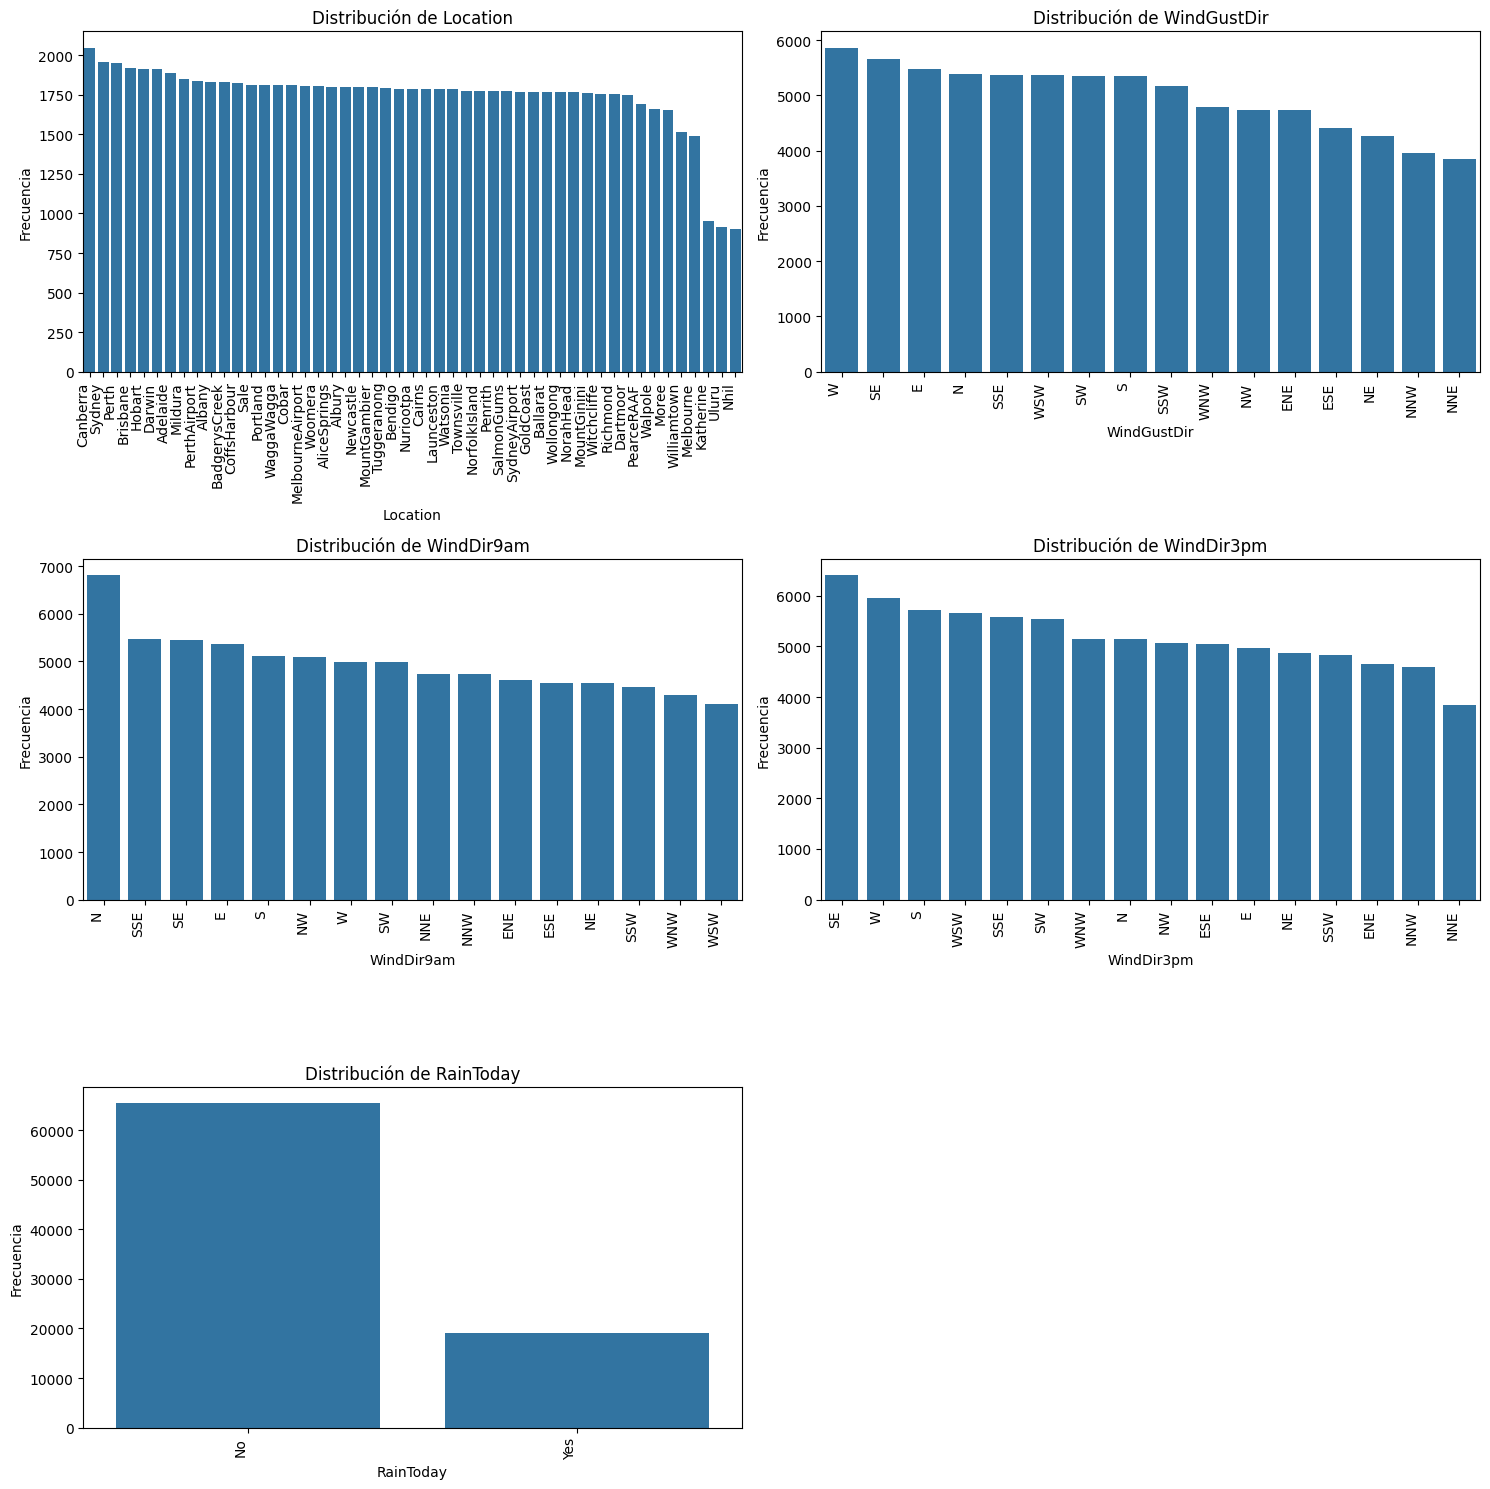

In [109]:
# Visualización de variables categóricas en el DataFrame de entrenamiento

try:
    # Filtramos solo las columnas de tipo 'object' en X_train, y excluimos la variable 'Date'
    categorical_cols_xtrain = [col for col in X_train.select_dtypes(include='object').columns if col != 'Date']

    if not categorical_cols_xtrain:
        print("No se encontraron columnas de tipo 'object' (excluyendo 'Date') en el DataFrame X_train.")
    else:
        num_cols = len(categorical_cols_xtrain)
        if num_cols > 0:
            # Calcula el número de filas y columnas para los subplots
            import math
            num_rows = math.ceil(num_cols / 2) 

            plt.figure(figsize=(15, 5 * num_rows)) 

            for i, col in enumerate(categorical_cols_xtrain):
                plt.subplot(num_rows, 2, i + 1) 
                sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index)
                plt.title(f'Distribución de {col}')
                plt.xlabel(col)
                plt.ylabel('Frecuencia')
                plt.xticks(rotation=90, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("No hay variables categóricas para graficar.")

except Exception as e:
    print(f"Ocurrió un error durante la generación de los gráficos: {e}")

### Analisis de nuestras variables numericas

Generamos graficos de boxplot para estas variables numericas.

In [110]:
#Codigo que utilizamos para graficar las variables numericas
variables_numericas = X_train.select_dtypes(exclude='object').columns
num_cols_displot = len(variables_numericas)
num_rows_displot = (num_cols_displot + 2) // 3 

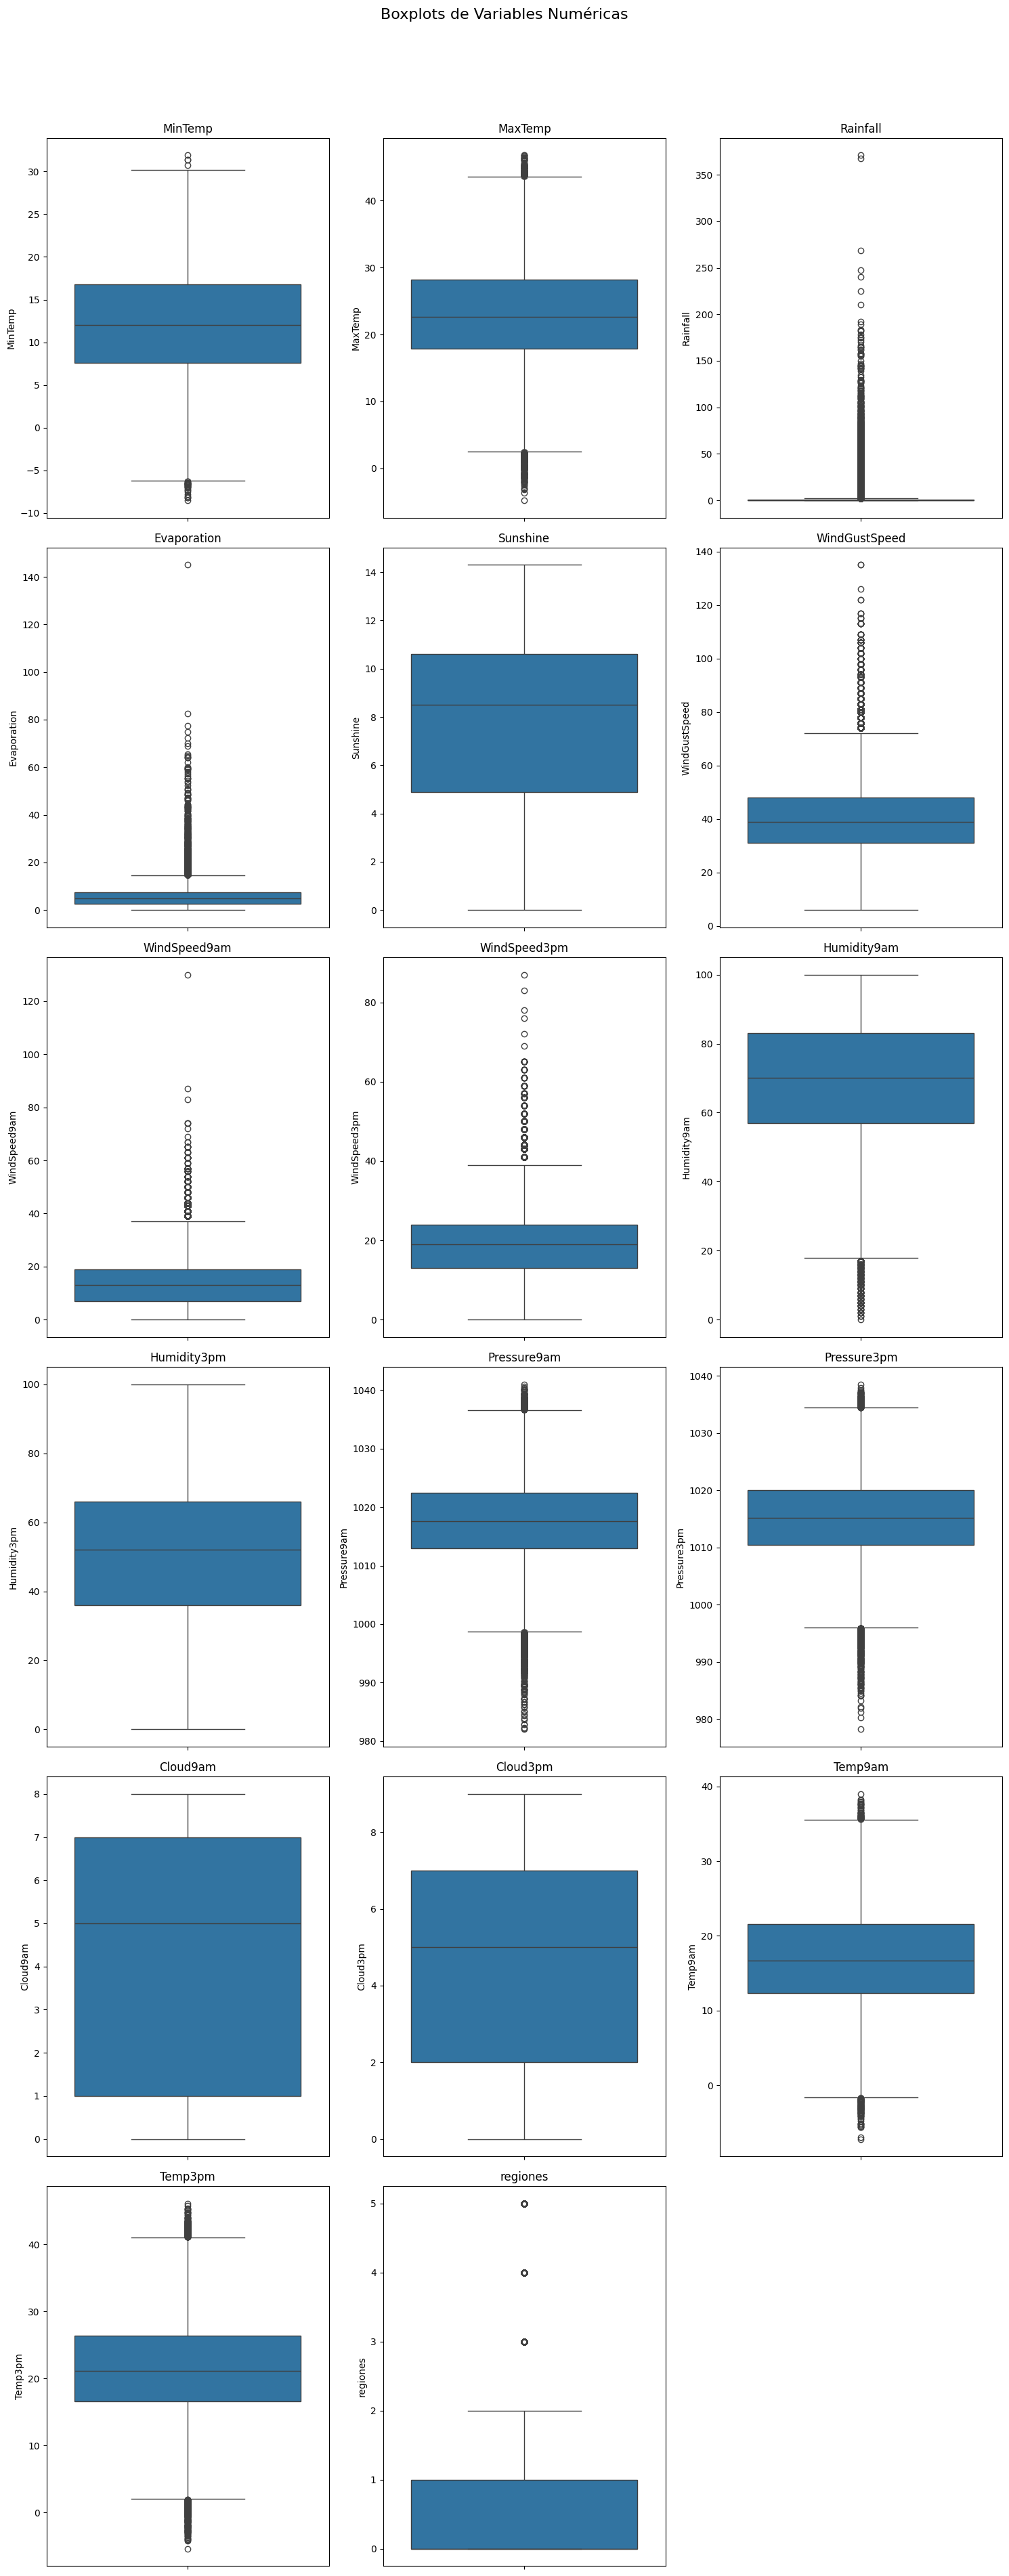

In [111]:
plt.figure(figsize=(15, 40 ))
plt.suptitle('Boxplots de Variables Numéricas', fontsize=16)

for i, col in enumerate(variables_numericas):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Analisis del grafico:
Notamos una gran presencia de outliers en la mayoria de nuestras variables. 
Tambien podemos observar la grafica de Rainfall donde esta se encuentra comprimida en valores pequeños (cercanos a 0), como en esta variable se intenta capturar la cantidad de mm de agua que llovio, podria tratarse de manera diferenciada, ya que sus valores atipicos posiblemente sean poco comunes, pero no sean outliers natos.

Las variables con mayor frecuencia de outliers son: 
* Rainfall
* MinTemp
* MaxTemp
* Evaporation
* WindGustSpeed
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Pressure9am
* Pressure3pm
* Temp9am
* Temp3pm

En todos los casos, esta presencia podria deberse a un comportamiento de la naturaleza. Debemos actuar con precaucion a la hora de trabajarlos.

Generamos graficas de histogramas (con curva Kde).

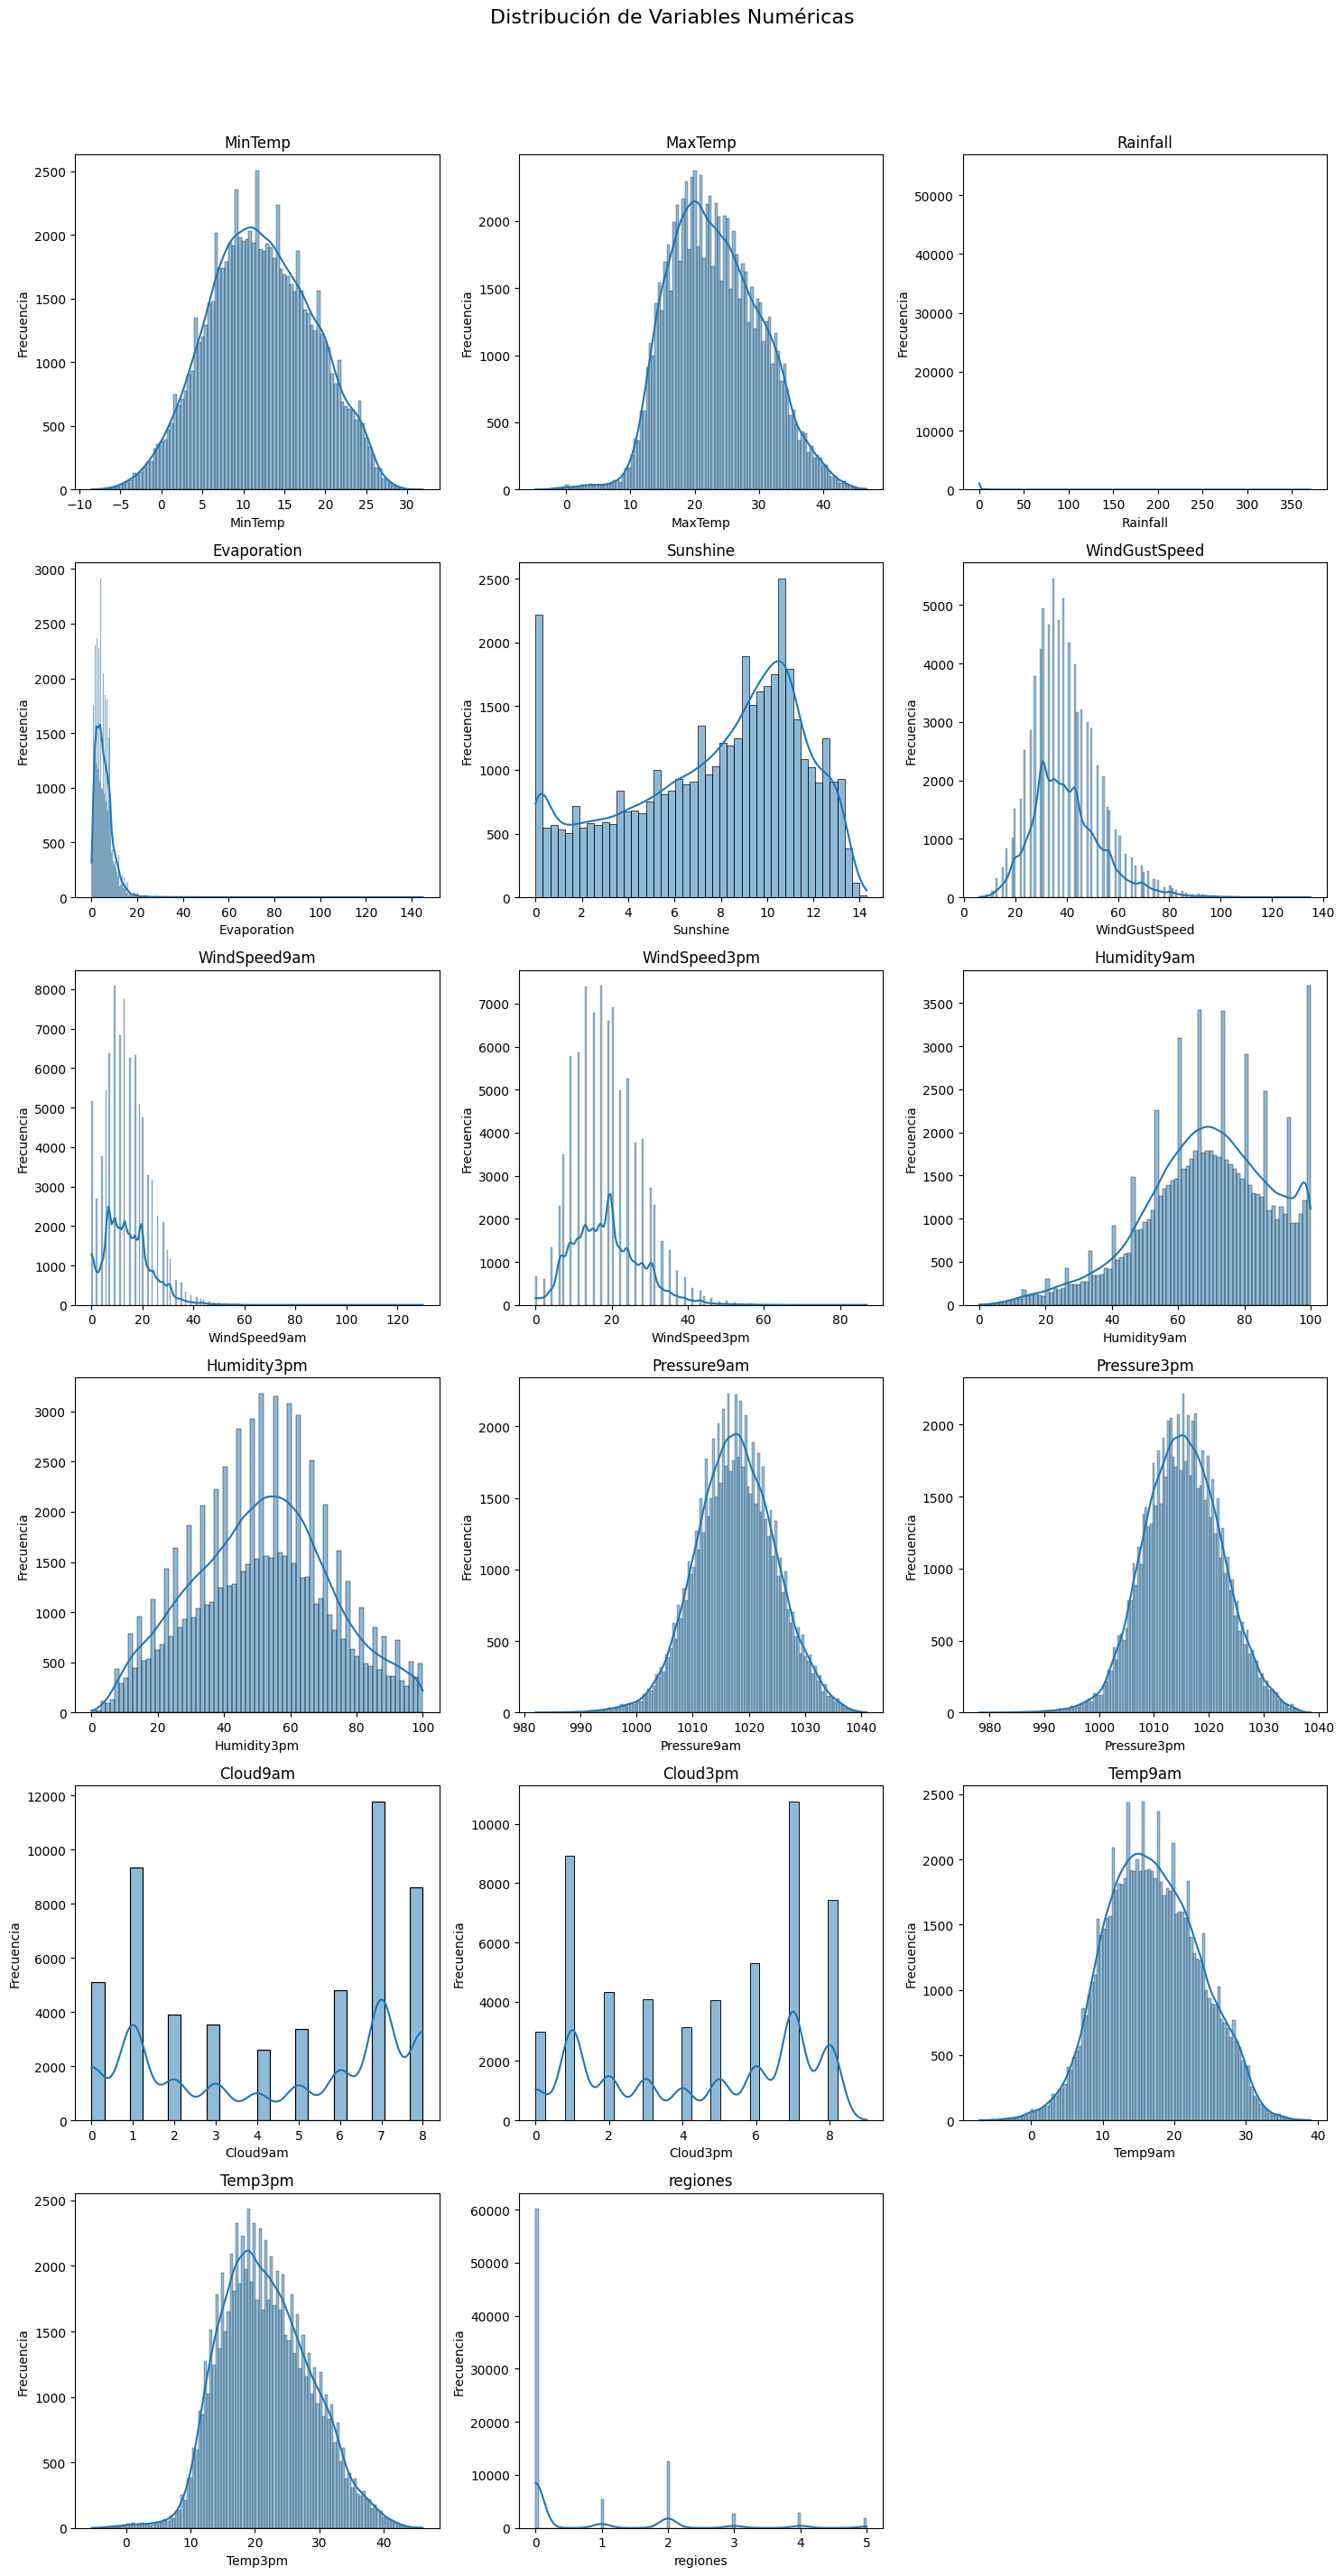

In [112]:


plt.figure(figsize=(15, 5 * num_rows_displot))
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)

for i, col in enumerate(variables_numericas):
    plt.subplot(num_rows_displot, 3, i + 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Analisis de grafico de histogramas
En este grafico, lo que podemos observar son las distribuciones de nuestras variables cuantitativas. En este se puede notar que hay variables que estas sesgadas, como por ejemplo: Evaporation (que tiene un notable sesgo hacia la derecha), Sunshine, etc.

Al mismo tiempo notamos que varias variables podrian indicar una cierta distribucion normal, no en perfecta normalidad, pero sus graficas tienden a mostrar una campana, estas son: Mintemp, Maxtemp, Pressure9am, Pressure3pm, Temp9am y Temp3pm. 

Tambien podemos observar en varias graficas la presencia de una distribucion bimodal, y graficas que se asemejan a tener una distribucion normal pero no llega del todo a suavizarse, sino que presentan ciertas deformaciones.

----

Grafico pairplot solo para visualizar las dispersiones entre variables.

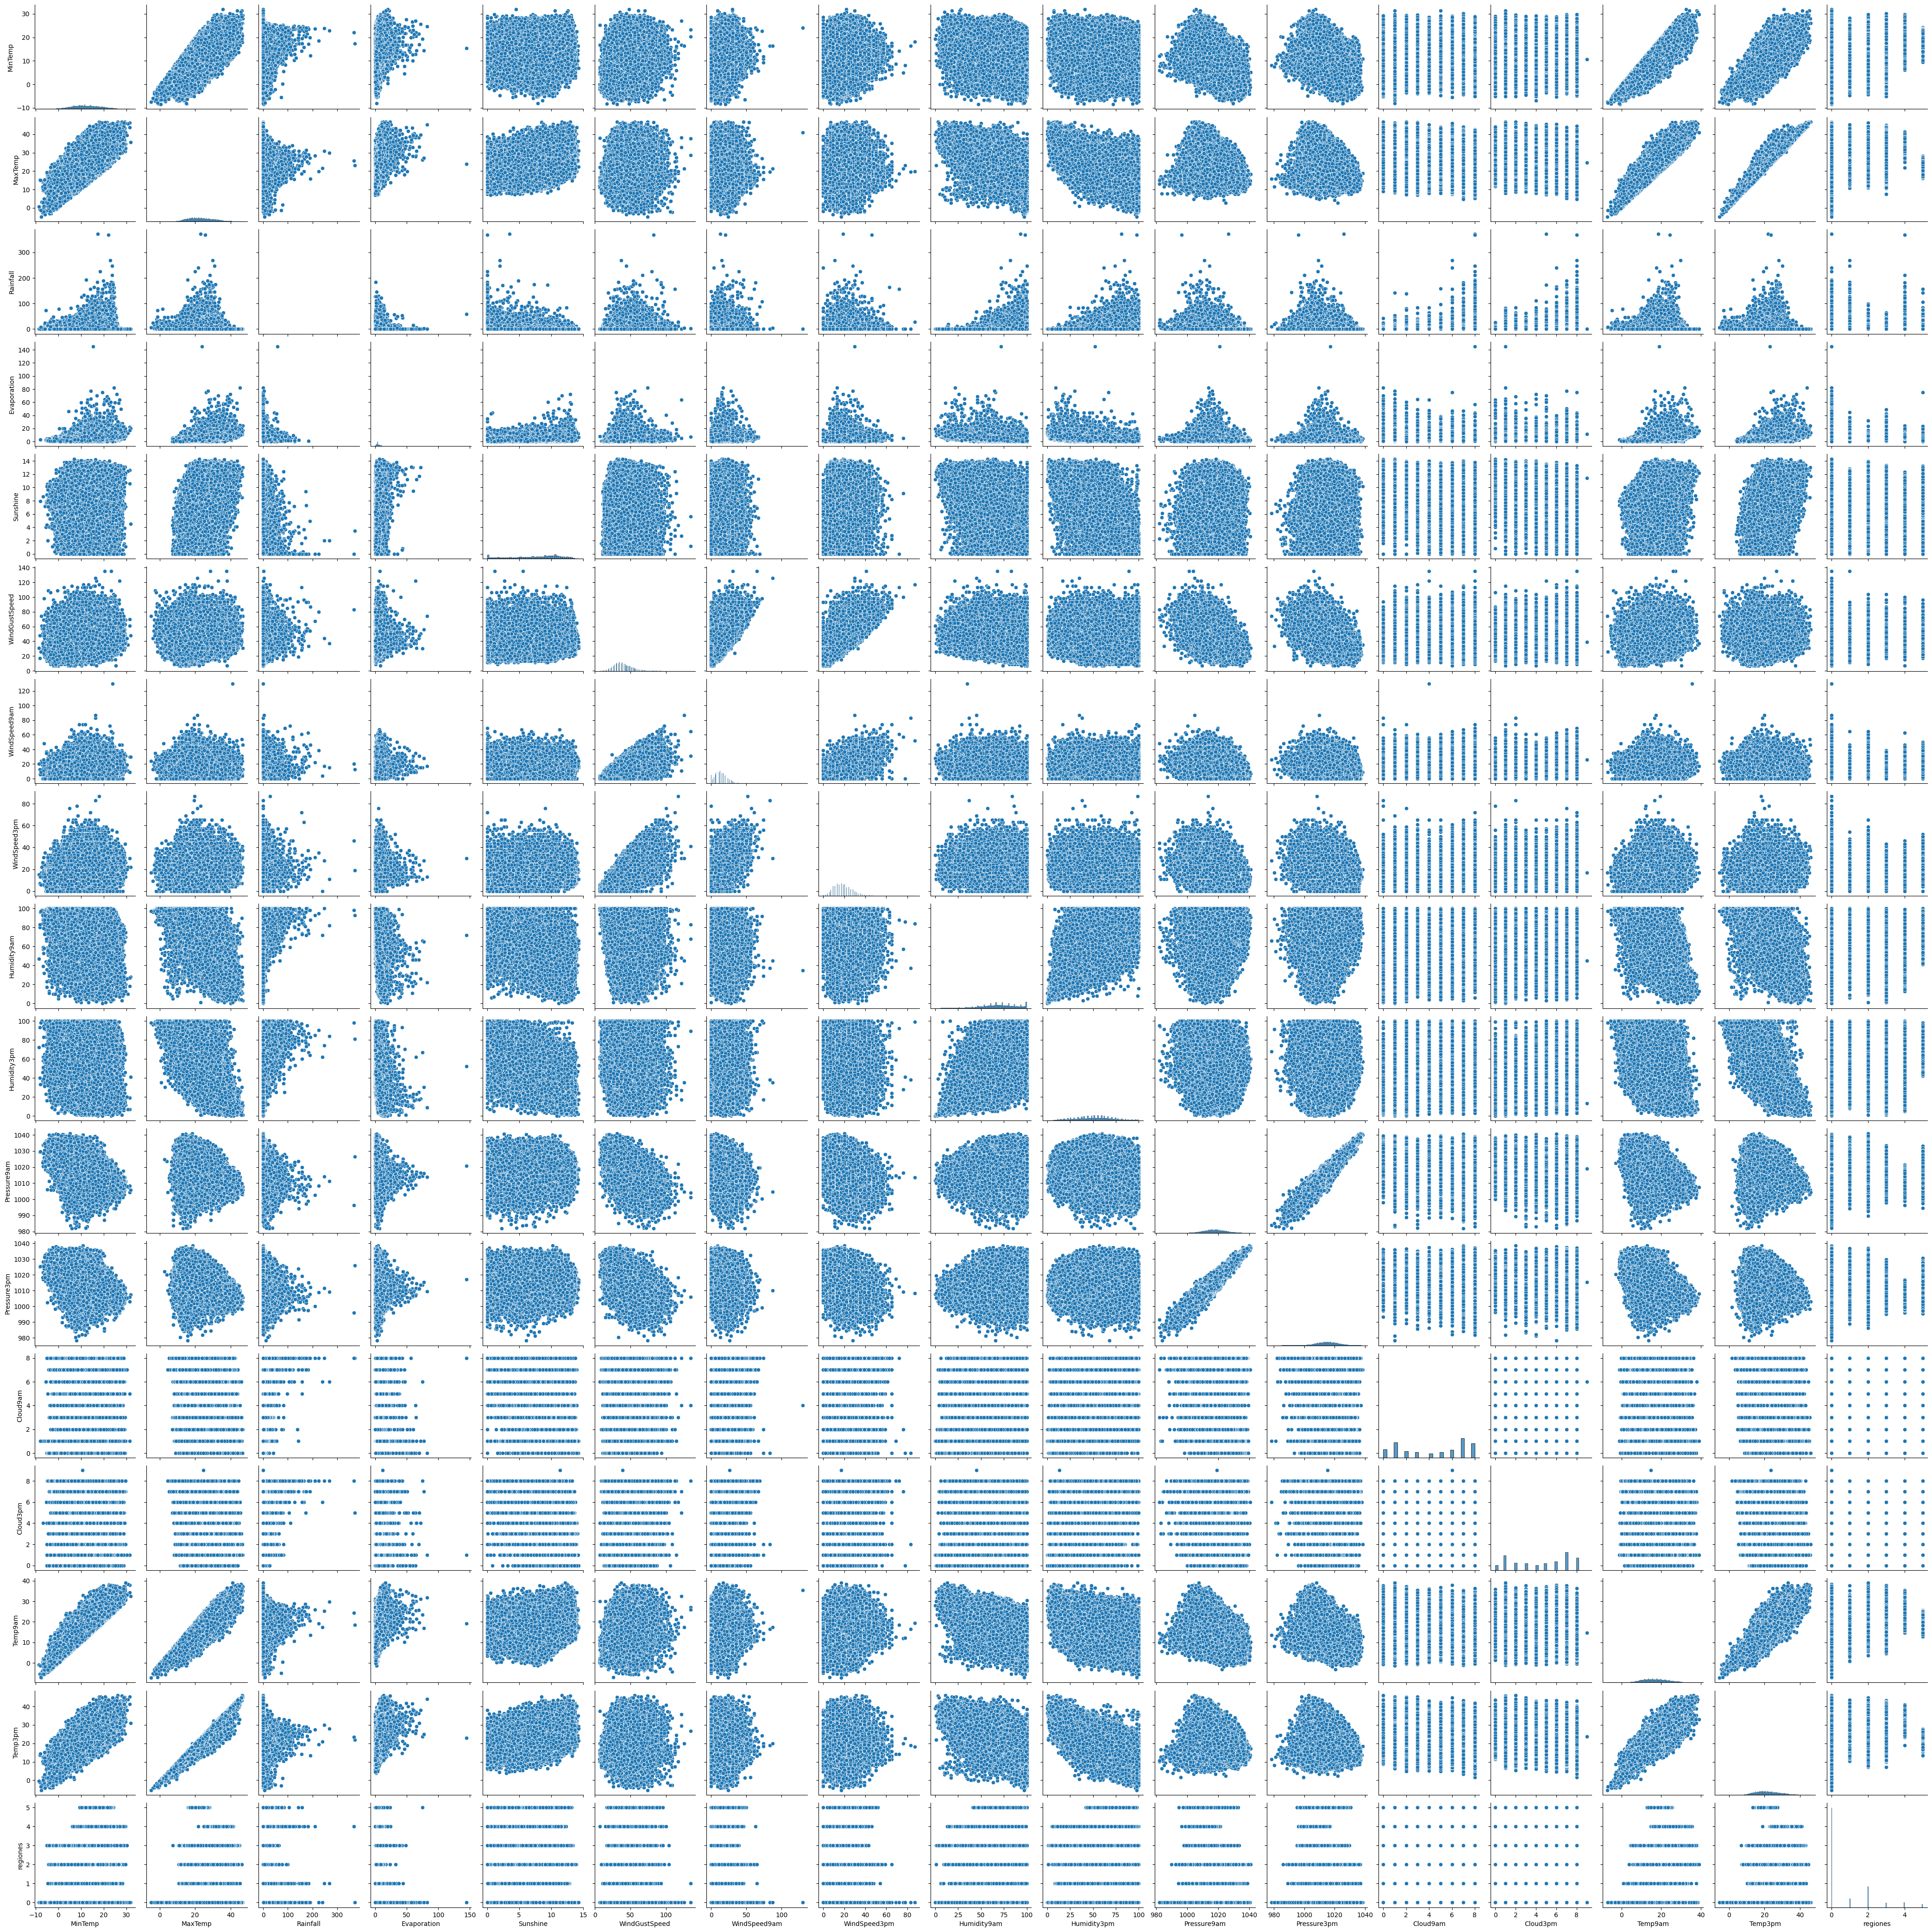

In [113]:
sns.pairplot(X_train[variables_numericas])
plt.show()

#### Pairplot

Este grafico fue creado solo para la observacion y dar un pequeño pantallazo de estas distribuciones entre par de variables.

Dato a tener en cuenta: 
Algunas de estas graficas parecen mostrar una cierta linealidad entre variables.

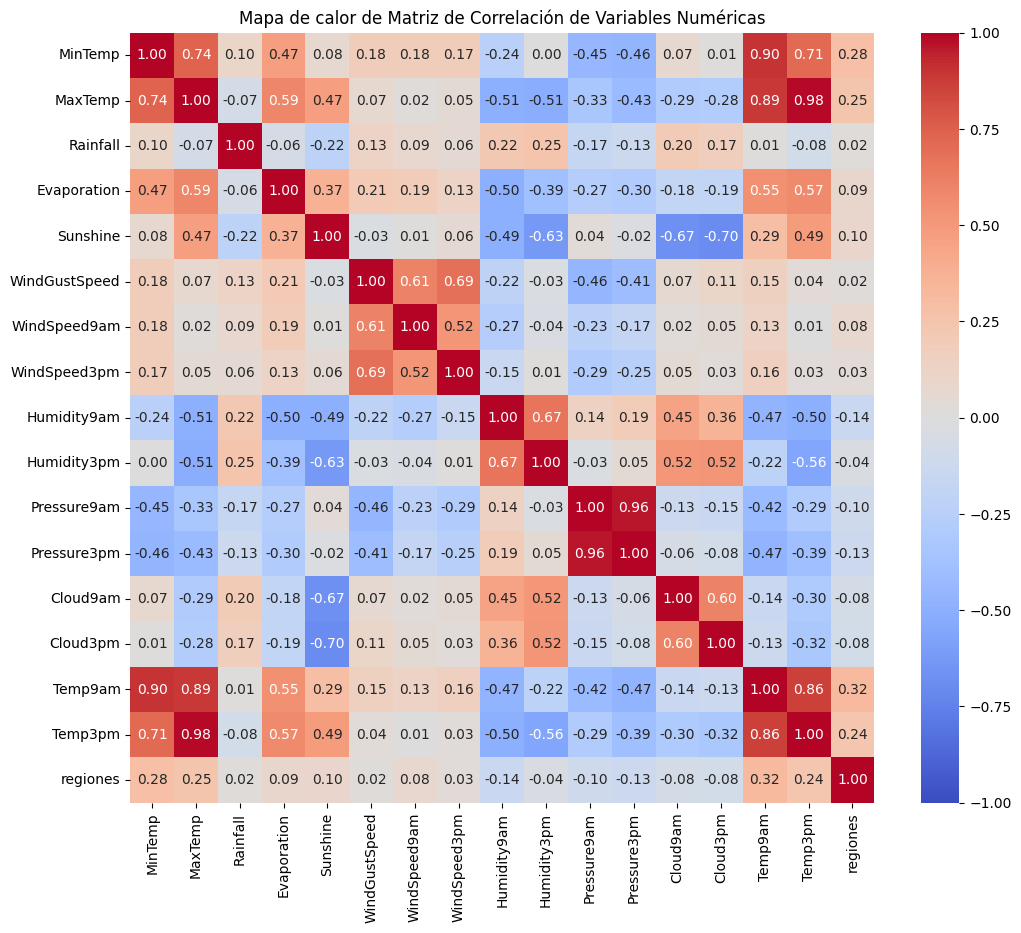

In [114]:

plt.figure(figsize=(12, 10))
sns.heatmap(X_train[variables_numericas].corr(method='pearson'),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            vmin=-1,
            vmax=1)
plt.title('Mapa de calor de Matriz de Correlación de Variables Numéricas')
plt.show()

**Mayores Correlaciones Positivas:**

| Variable 1    | Variable 2    | Correlación | Nivel        |
|---------------|---------------|-------------|--------------|
| MaxTemp       | Temp3pm       | 0.98        | Muy Fuerte   |
| Temp9am       | MinTemp       | 0.90        | Muy Fuerte   |
| MaxTemp       | Temp9am       | 0.89        | Fuerte       |
| Pressure9am   | Pressure3pm   | 0.96        | Muy Fuerte   |
| Cloud9am      | Cloud3pm      | 0.60        | Moderada     |
| WindGustSpeed | WindSpeed3pm  | 0.69        | Moderada     |
| WindSpeed9am  | WindGustSpeed | 0.61        | Moderada     |

**Mayores Correlaciones Negativas:**

| Variable 1    | Variable 2    | Correlación | Nivel        |
|---------------|---------------|-------------|--------------|
| Humidity9am   | Sunshine      | -0.63       | Moderada     |
| Humidity3pm   | Sunshine      | -0.70       | Moderada     |
| Pressure9am   | Humidity9am   | -0.51       | Moderada     |
| Pressure3pm   | Humidity3pm   | -0.56       | Moderada     |
| Evaporation   | Humidity9am   | -0.50       | Moderada     |
| Evaporation   | Humidity3pm   | -0.63       | Moderada     |
| MaxTemp       | Humidity9am   | -0.51       | Moderada     |
| MaxTemp       | Humidity3pm   | -0.43       | Moderada     |


# Tratamiento y limpieza de los datos

Recategorizamos las clases

In [147]:
print(X_train.select_dtypes(include='object').columns)

# Recategorizamos las variables de tipo object en variables categoricas
columns_object = X_train.select_dtypes(include='object').columns
X_train[columns_object] = X_train[columns_object].astype('category')
X_test[columns_object] = X_test[columns_object].astype('category')
X_val[columns_object] = X_val[columns_object].astype('category')

print(X_train.select_dtypes(include='category').columns)
print(X_test.select_dtypes(include='category').columns)
print(X_val.select_dtypes(include='category').columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')


En este proceso, evaluamos cada fila del dataset y eliminamos aquellas que tienen más del 50% de sus columnas con valores nulos. La razón detrás de esta decisión es que, si una fila tiene demasiados datos faltantes, cualquier imputación podría introducir sesgos o valores artificiales que afectarían el análisis.

In [148]:
# Definimos el umbral
umbral = int(X_train.shape[1] // 2 )

# Definimos una máscara booleana para seleccionar las columnas
mask_train = X_train.notnull().sum(axis=1) > umbral

# Visualizamos la cantidad de valores que tenemos antes del umbralado
print(f'Cantidad de datos antes del umbralado: {len(X_train)}')

# Aplicamos la máscara al X_train e y_train
X_train = X_train[mask_train]
y_train = y_train[mask_train]

# Visualizamos la cantidad de valores que tenemos después del umbralado
print(f'Cantidad de datos despues del umbralado: {len(X_train)}')

# Lo aplicamos para X_test y X_val

mask_test = X_test.notnull().sum(axis=1) > umbral
mask_val = X_val.notnull().sum(axis=1) > umbral

X_test = X_test[mask_test]
X_val = X_val[mask_val]
y_test = y_test[mask_test]
y_val = y_val[mask_val]

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

Cantidad de datos antes del umbralado: 85315
Cantidad de datos despues del umbralado: 84642


((84642, 23), (84642, 1), (28209, 23), (28209, 1), (28226, 23), (28226, 1))

Transformamos 'Date' en datetime para poder trabajar con ella. Ademas vamos a trabajar usando unicamente los meses , ya que consideramos que para este estudio no es relevante una mayor descomposición de la fecha.


In [149]:
# Recategorizamos la columna Date
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_val['Date'] = pd.to_datetime(X_val['Date'])

# Creamos una nueva columna con el mes
X_train['Month'] = X_train['Date'].dt.month
X_test['Month'] = X_test['Date'].dt.month
X_val['Month'] = X_val['Date'].dt.month

**Inconveniente con la variable Month:**

Si asignamos números del 1 al 12 a los meses (enero=1, febrero=2,.... diciembre=12), el modelo puede interpretar que la "distancia" entre diciembre (12) y enero (1) es muy grande (11 unidades), cuando en realidad son meses consecutivos en un ciclo.

Para poder conservar la ordinalidad cíclica de los meses, decidimos representar los meses como variables seno y coseno.

In [150]:
# Realizamos la codificacion
X_train['month_sin'] = np.sin(2 * np.pi * X_train['Month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['Month'] / 12)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['Month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['Month'] / 12)

X_val['month_sin'] = np.sin(2 * np.pi * X_val['Month'] / 12)
X_val['month_cos'] = np.cos(2 * np.pi * X_val['Month'] / 12)

# Eliminamos la columna month
X_train = X_train.drop('Month', axis=1)
X_test = X_test.drop('Month', axis=1)
X_val = X_val.drop('Month', axis=1) 

# Vemos la salida
print(X_train[['month_sin', 'month_cos']])

           month_sin     month_cos
106593 -5.000000e-01  8.660254e-01
69296   1.224647e-16 -1.000000e+00
4022   -8.660254e-01  5.000000e-01
57684   1.000000e+00  6.123234e-17
47388  -5.000000e-01  8.660254e-01
...              ...           ...
27978   1.000000e+00  6.123234e-17
138687  8.660254e-01 -5.000000e-01
53708  -1.000000e+00 -1.836970e-16
18129   5.000000e-01  8.660254e-01
103792  1.224647e-16 -1.000000e+00

[84642 rows x 2 columns]


Este inconveniente cíclico debemos resolverlo en todas las variables que nos representen un comportamiento cíclico. En este caso, tenemos las columnas que representan la dirección del viento presentan un comportamiento cíclico:

- WindDir9am
- WindDir3pm

In [151]:
print(list(X_train['WindDir9am'].unique()))
print(list(X_train['WindGustDir'].unique()))

['N', 'W', 'S', 'WNW', 'NE', 'WSW', 'ESE', 'SW', 'NNW', 'NNE', nan, 'SE', 'SSE', 'ENE', 'E', 'NW', 'SSW']
['NNW', 'WNW', 'WSW', 'SSW', 'NW', 'N', 'SW', 'NNE', 'ESE', 'SE', 'ENE', 'W', 'E', 'SSE', 'S', nan, 'NE']


Podemos observar que tenemos la dirección del viento representada por los puntos cardinales e intermedios. Para resolver este problema decidimos mapear estos puntos usando sus ángulos correspondientes. Por convención Norte = 0º, Este = 90º, Sur = 180º, Oeste = 270º. 

Luego lo codificaremos usando seno y coseno para preservar la información de la dirección del viento.

- Cabe recalcar que antes de hacer esta codificación, imputaremos los valores faltantes usando como criterio el agrupamiento por zona y fecha e imputando por la moda. Para ello debemos en primera instancia asignarle los ángulos a cada punto cardinal.

Además tenemos la variable WindGustDir que nos indica la dirección del viento más fuerte. Lo codificaremos de la misma manera.

In [152]:
direccion_angulo = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Convertir los valores de dirección del viento a ángulos en grados
X_train['WindDir9am'] = X_train['WindDir9am'].map(direccion_angulo).astype(float) 
X_test['WindDir9am'] = X_test['WindDir9am'].map(direccion_angulo).astype(float)   
X_val['WindDir9am'] = X_val['WindDir9am'].map(direccion_angulo).astype(float)  


X_train['WindDir3pm'] = X_train['WindDir3pm'].map(direccion_angulo).astype(float) 
X_test['WindDir3pm'] = X_test['WindDir3pm'].map(direccion_angulo).astype(float)   
X_val['WindDir3pm'] = X_val['WindDir3pm'].map(direccion_angulo).astype(float) 

X_train['WindGustDir'] = X_train['WindGustDir'].map(direccion_angulo).astype(float)
X_test['WindGustDir'] = X_test['WindGustDir'].map(direccion_angulo).astype(float)
X_val['WindGustDir'] = X_val['WindGustDir'].map(direccion_angulo).astype(float)


Codificación de RainToday.

- RainToday también sera imputada con la moda. Para ello también hacemos la codificación primero y luego la imputación. 

In [153]:
X_train['RainToday'] = X_train['RainToday'].map({'No': 0, 'Yes': 1})
X_test['RainToday'] = X_test['RainToday'].map({'No': 0, 'Yes': 1})
X_val['RainToday'] = X_val['RainToday'].map({'No': 0, 'Yes': 1})

Imputación usando la MODA

Para imputar los valores faltantes de las columnas categóricas ( post transformación a numéricas discretas como la dirección del viento ), utilizaremos la moda de cada región teniendo en cuenta que esa MODA será la del mismo diá del valor faltante. En resumen, imputaremos agrupando por fecha y región.

- Este criterio quelegimos nos parecio mas razonable que usar KNN imputer en estas columnas particulares, ya que KNN imputer trabaja usando la media de los vecinos mas cercanos para hacer la imputación.

In [ ]:
# Codigo viejo
"""
columnas_a_imputar = ['RainToday','WindDir9am','WindDir3pm','WindGustDir','Cloud9am','Cloud3pm']
for col in columnas_a_imputar:
    # Agrupamos por region y fecha exacta
    X_train[col] = X_train.groupby(['regiones','Date'])[col].transform(
        lambda x: x.fillna(
            x.mode().iloc[0] if not x.mode().empty else x.dropna().iloc[0] if not x.dropna().empty else x
        )
    )
"""

In [154]:
X_train.isna().sum()

Date                 0
Location             0
MinTemp            189
MaxTemp            118
Rainfall           796
Evaporation      35878
Sunshine         40022
WindGustDir       5021
WindGustSpeed     4979
WindDir9am        5394
WindDir3pm        1710
WindSpeed9am       396
WindSpeed3pm      1017
Humidity9am        813
Humidity3pm       1796
Pressure9am       7819
Pressure3pm       7797
Cloud9am         31808
Cloud3pm         33629
Temp9am            302
Temp3pm           1268
RainToday          796
regiones             0
month_sin            0
month_cos            0
dtype: int64

In [157]:
columnas_a_imputar = ['RainToday','WindDir9am','WindDir3pm','WindGustDir','Cloud9am','Cloud3pm']

def imputar_moda_o_mas_frecuente(df, columnas):
    
    df = df.copy()
    for _, grupo in df.groupby(['regiones', 'Date']):
        for col in columnas:
            if grupo[col].isna().any():
                conteos = grupo[col].value_counts(dropna=True)
                if conteos.empty:
                    continue  # Todos los valores son NaN, no imputamos
                else:
                    valor = conteos.idxmax()  # El valor más frecuente
                    df.loc[grupo.index, col] = grupo[col].fillna(valor)
    return df

X_train = imputar_moda_o_mas_frecuente(X_train, columnas_a_imputar)
X_test = imputar_moda_o_mas_frecuente(X_test, columnas_a_imputar)
X_val = imputar_moda_o_mas_frecuente(X_val, columnas_a_imputar)


In [158]:
print(X_train.isna().sum())


Date                 0
Location             0
MinTemp            189
MaxTemp            118
Rainfall           796
Evaporation      35878
Sunshine         40022
WindGustDir        138
WindGustSpeed     4979
WindDir9am         296
WindDir3pm          25
WindSpeed9am       396
WindSpeed3pm      1017
Humidity9am        813
Humidity3pm       1796
Pressure9am       7819
Pressure3pm       7797
Cloud9am          1207
Cloud3pm          1493
Temp9am            302
Temp3pm           1268
RainToday            0
regiones             0
month_sin            0
month_cos            0
dtype: int64


Ahora sí transformamos las categorías que representan una ordinalidad cíclica.

In [159]:
X_train['WindDir9am_radianes'] = np.radians(X_train['WindDir9am'])
X_test['WindDir9am_radianes'] = np.radians(X_test['WindDir9am'])
X_val['WindDir9am_radianes'] = np.radians(X_val['WindDir9am'])

X_train['WindDir9am_sin'] = np.sin(X_train['WindDir9am_radianes'])
X_test['WindDir9am_sin'] = np.sin(X_test['WindDir9am_radianes'])
X_val['WindDir9am_sin'] = np.sin(X_val['WindDir9am_radianes'])

X_train['WindDir9am_cos'] = np.cos(X_train['WindDir9am_radianes'])
X_test['WindDir9am_cos'] = np.cos(X_test['WindDir9am_radianes'])
X_val['WindDir9am_cos'] = np.cos(X_val['WindDir9am_radianes'])

# WindDir3pm
X_train['WindDir3pm_radianes'] = np.radians(X_train['WindDir3pm'])
X_test['WindDir3pm_radianes'] = np.radians(X_test['WindDir3pm'])
X_val['WindDir3pm_radianes'] = np.radians(X_val['WindDir3pm'])

X_train['WindDir3pm_sin'] = np.sin(X_train['WindDir3pm_radianes'])
X_test['WindDir3pm_sin'] = np.sin(X_test['WindDir3pm_radianes'])
X_val['WindDir3pm_sin'] = np.sin(X_val['WindDir3pm_radianes'])

X_train['WindDir3pm_cos'] = np.cos(X_train['WindDir3pm_radianes'])
X_test['WindDir3pm_cos'] = np.cos(X_test['WindDir3pm_radianes'])
X_val['WindDir3pm_cos'] = np.cos(X_val['WindDir3pm_radianes'])

# WindGustDir
X_train['WindGustDir_radianes'] = np.radians(X_train['WindGustDir'])
X_test['WindGustDir_radianes'] = np.radians(X_test['WindGustDir'])
X_val['WindGustDir_radianes'] = np.radians(X_val['WindGustDir'])

X_train['WindGustDir_sin'] = np.sin(X_train['WindGustDir_radianes'])
X_test['WindGustDir_sin'] = np.sin(X_test['WindGustDir_radianes'])
X_val['WindGustDir_sin'] = np.sin(X_val['WindGustDir_radianes'])

X_train['WindGustDir_cos'] = np.cos(X_train['WindGustDir_radianes'])
X_test['WindGustDir_cos'] = np.cos(X_test['WindGustDir_radianes'])
X_val['WindGustDir_cos'] = np.cos(X_val['WindGustDir_radianes'])

# Eliminamos las columnas originales de dirección del viento y la de los radianes
X_train = X_train.drop(['WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindDir9am_radianes', 'WindDir3pm_radianes', 'WindGustDir_radianes'], axis=1)
X_test = X_test.drop(['WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindDir9am_radianes', 'WindDir3pm_radianes', 'WindGustDir_radianes'], axis=1)
X_val = X_val.drop(['WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindDir9am_radianes', 'WindDir3pm_radianes', 'WindGustDir_radianes'], axis=1)


Decidimos hacer una imputación por la media por grupos de fecha y región, la lógica es imputar por la media de cada columna de cada grupo si solo si los valores nulos de esa columna en el grupo son mayores a 1, es decir, calcularemos la media al menos con 2 valores no nulos. Los datos que no cumplan con esa condicion seguiran siendo nulos.


In [161]:

columnas_numericas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Temp9am', 'Temp3pm'
]

def imputar_por_grupo_optimo(df, columnas):
    df_imputado = df.copy()
    grupos = df.groupby(['Date', 'regiones'])

    for _ , grupo in grupos:
        # Verificamos si alguna columna a imputar tiene NaNs
        if grupo[columnas].isna().any().any():
            indices = grupo.index
            medias = grupo[columnas].mean()
            conteo_no_nulos = grupo[columnas].notna().sum()

            for col in columnas:
                if grupo[col].isna().any() and conteo_no_nulos[col] > 1:
                    df_imputado.loc[indices, col] = grupo[col].fillna(medias[col])
    
    return df_imputado

df_imputado = imputar_por_grupo_optimo(X_train, columnas_numericas)


In [162]:
df_imputado.isna().sum()

Date                  0
Location              0
MinTemp              34
MaxTemp              18
Rainfall             70
Evaporation        4757
Sunshine           5347
WindGustSpeed       353
WindSpeed9am         36
WindSpeed3pm         45
Humidity9am          92
Humidity3pm         573
Pressure9am         117
Pressure3pm         117
Cloud9am           1207
Cloud3pm           1493
Temp9am              38
Temp3pm             477
RainToday             0
regiones              0
month_sin             0
month_cos             0
WindDir9am_sin      296
WindDir9am_cos      296
WindDir3pm_sin       25
WindDir3pm_cos       25
WindGustDir_sin     138
WindGustDir_cos     138
dtype: int64

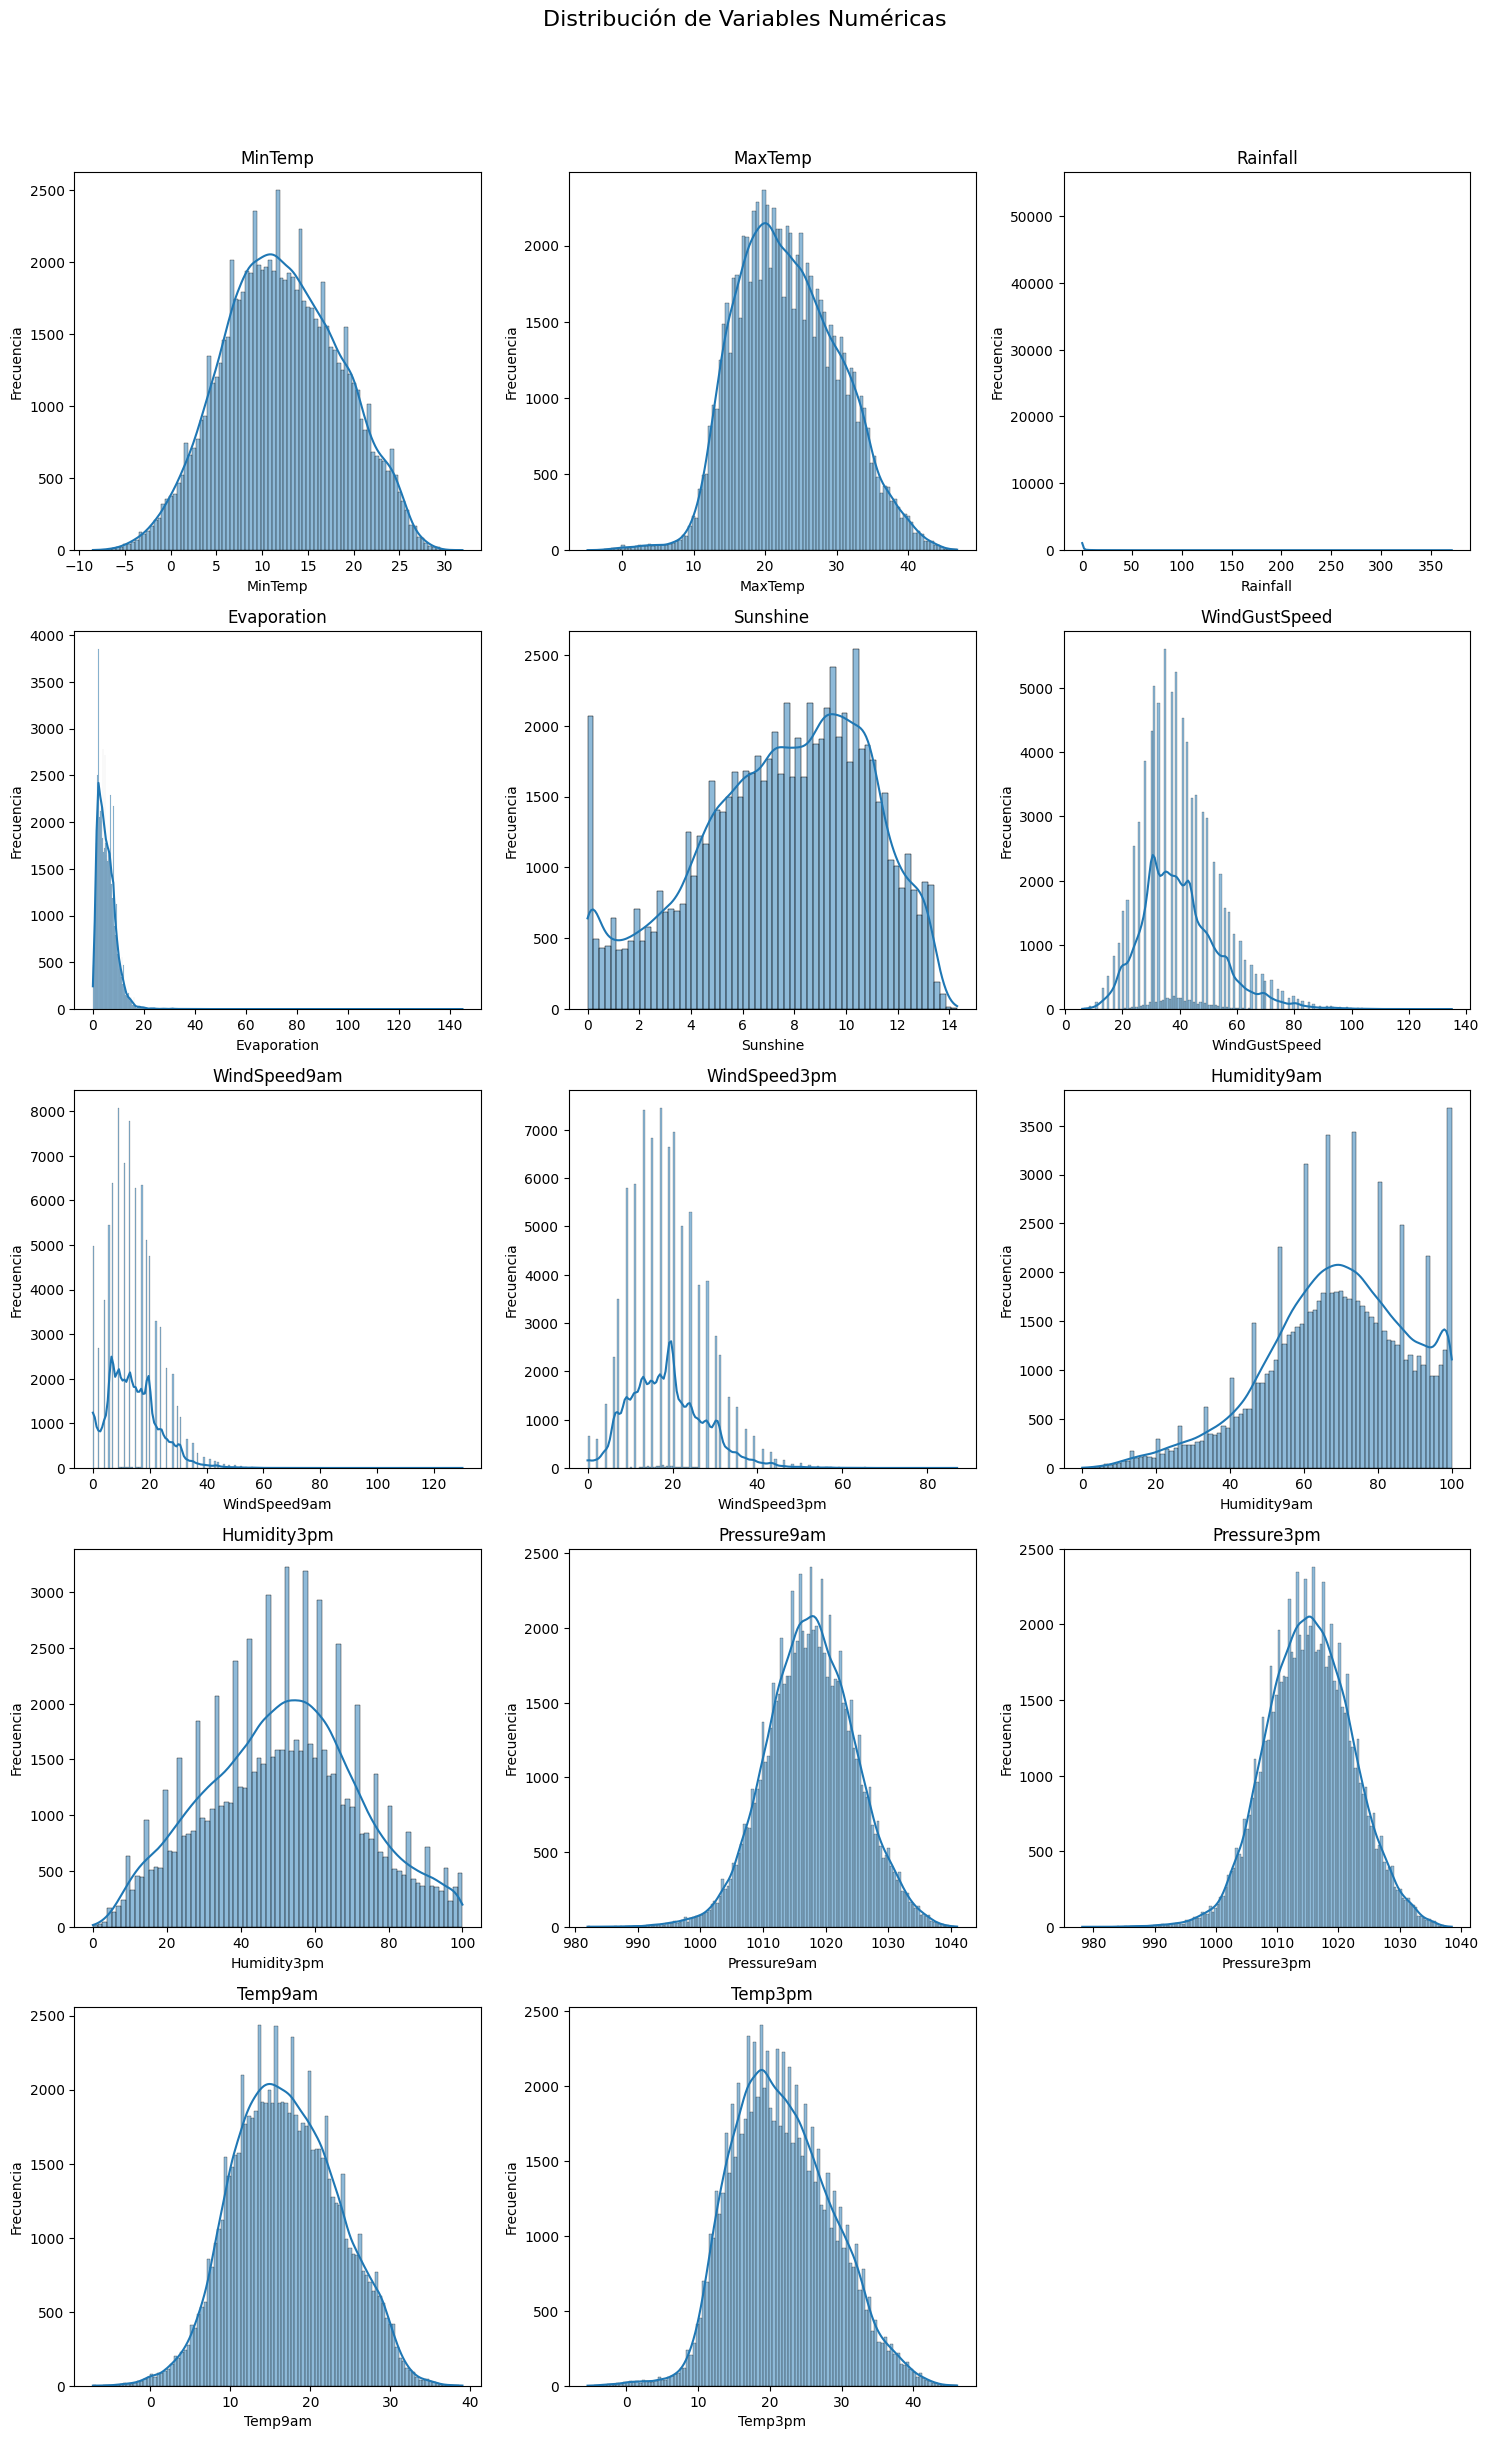

In [165]:
plt.figure(figsize=(15, 5 * num_rows_displot))
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)

for i, col in enumerate(columnas_numericas):
    plt.subplot(num_rows_displot, 3, i + 1)
    sns.histplot(df_imputado[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()